1. The goal here is to see how u can do prediction using Artificial Neural Network 
2. We will see how ANN works 

Dataset is on graduate admission dataset from kaggle which about a 
portfolio of students applying for abroad universities 

In [2]:
import pandas as pd 
import numpy as np 

In [4]:
df = pd.read_csv('/Users/meetsudra/Documents/GitHub/deeplearning/datasets/admission_data.csv')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 8)

In [6]:
# Checking for missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
df.duplicated().sum()

0

In [10]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [15]:
print(X_train.shape)
print(y_test.shape)

(400, 7)
(100,)


1. Scaling the values using min-max which is because we know the upper and lower bound
2. GRE max would be 340 ratings would be 5 max and so on 

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [24]:
# Model Building
import tensorflow 
from tensorflow import keras 
from keras import Sequential # Sequential stack of layers
from keras.layers import Dense 


In [38]:
model = Sequential()

model.add(Dense(7,activation="relu", input_dim=7)) # Relu just to build a model
model.add(Dense(7,activation="relu")) 
model.add(Dense(1,activation="linear")) # Since we are doing a linear reg problem

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [41]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4156 - val_loss: 0.4069
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3629 - val_loss: 0.3418
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2995 - val_loss: 0.2775
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2394 - val_loss: 0.2145
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1836 - val_loss: 0.1525
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1332 - val_loss: 0.0950
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0761 - val_loss: 0.0514
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - val_loss: 0.0247
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - val_loss: 0.0144
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - val_loss: 0.0127
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - val_lo

In [42]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [43]:
y_pred

array([[0.6322119 ],
       [0.69541806],
       [0.9681389 ],
       [0.7056986 ],
       [0.8076626 ],
       [0.6619658 ],
       [0.7291904 ],
       [0.7101097 ],
       [0.7721449 ],
       [0.6528783 ],
       [0.70579565],
       [0.5787897 ],
       [0.84346426],
       [0.7869155 ],
       [0.74782777],
       [0.86900824],
       [0.621812  ],
       [0.7405637 ],
       [0.9456921 ],
       [0.68522555],
       [0.60330266],
       [0.783134  ],
       [0.82605356],
       [0.59528494],
       [0.8044891 ],
       [0.58745384],
       [0.96504915],
       [0.6461071 ],
       [0.8542102 ],
       [0.6720733 ],
       [0.6307869 ],
       [0.7805518 ],
       [0.6208631 ],
       [0.89379036],
       [0.5337957 ],
       [0.7965086 ],
       [0.69903207],
       [0.6549838 ],
       [0.6614115 ],
       [0.90948874],
       [0.5926261 ],
       [0.637376  ],
       [0.79952633],
       [0.9820656 ],
       [0.7558461 ],
       [0.5085945 ],
       [0.6556528 ],
       [0.618

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8094095474547096

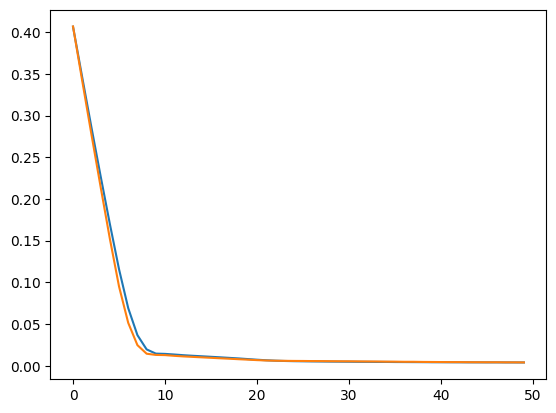

In [48]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()

In [49]:
# We see loss decreasing and getting stable 